Raw model

In [1]:
from keras.models import Sequential, load_model 
from keras.layers.core import Dense, Dropout, Flatten, Activation 
from sklearn import preprocessing
import csv
import pandas as pd
with open('013_b_1114_1_2_p1.csv', newline='') as csvfile1:
    data1 = pd.read_csv(csvfile1)
    data1 = data1[0:100]
with open('014_b_1114_1_2_p2.csv', newline='') as csvfile2:
    data2 = pd.read_csv(csvfile2)
    data2 = data2[0:100]
    
X = data1.loc[:,['p1Cash','StockPrice','p1TotalAsset']]
X['p2TotalAsset'] = data2.loc[:,['p2TotalAsset']]
X['p1ChechHistory'] = pd.get_dummies(data1.loc[:,'p1ChechHistory'])['yes']
X = preprocessing.scale(X, axis = 0)

    
Y = data1.loc[:,'p1Decision']
Y_dum = pd.get_dummies(Y)

model = Sequential()
model.add(Dense(80, input_dim = 5, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()


# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# fit the model
test = model.fit(X,Y_dum, epochs = 150, batch_size = 80, validation_split = 0.2, shuffle = True)


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 243       
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________
Train on 80 samples, validate on 20 samples
Epoch 1/150
80/80 [==============================] - 1s 15ms/step - loss: 1.1023 - accuracy: 0.2375 - val_loss: 1.1716 - val_accuracy: 0.2500
Epoch 2/150
80/80 [==============================] - 0s 62us/step - loss: 1.0974 - accuracy: 0.2375 - val_loss: 1.1702 - val_accuracy: 0.2500
Epoch 3/150
80/80 [==============================] - 0s 57us/step - loss: 1.0933 - accuracy: 0.2625 - val_loss: 1.1685 - val_accuracy: 0.2500
Epoch 4/150
80/80 [=============================

Epoch 54/150
80/80 [==============================] - 0s 25us/step - loss: 0.9097 - accuracy: 0.6625 - val_loss: 1.1060 - val_accuracy: 0.2000
Epoch 55/150
80/80 [==============================] - 0s 34us/step - loss: 0.9063 - accuracy: 0.6500 - val_loss: 1.1049 - val_accuracy: 0.2000
Epoch 56/150
80/80 [==============================] - 0s 46us/step - loss: 0.9029 - accuracy: 0.6500 - val_loss: 1.1038 - val_accuracy: 0.2000
Epoch 57/150
80/80 [==============================] - 0s 37us/step - loss: 0.8995 - accuracy: 0.6500 - val_loss: 1.1027 - val_accuracy: 0.2000
Epoch 58/150
80/80 [==============================] - 0s 44us/step - loss: 0.8960 - accuracy: 0.6500 - val_loss: 1.1016 - val_accuracy: 0.2000
Epoch 59/150
80/80 [==============================] - 0s 49us/step - loss: 0.8926 - accuracy: 0.6500 - val_loss: 1.1005 - val_accuracy: 0.2000
Epoch 60/150
80/80 [==============================] - 0s 53us/step - loss: 0.8891 - accuracy: 0.6500 - val_loss: 1.0994 - val_accuracy: 0.2000

Epoch 112/150
80/80 [==============================] - 0s 62us/step - loss: 0.7075 - accuracy: 0.7625 - val_loss: 1.0470 - val_accuracy: 0.2500
Epoch 113/150
80/80 [==============================] - 0s 50us/step - loss: 0.7044 - accuracy: 0.7625 - val_loss: 1.0465 - val_accuracy: 0.2500
Epoch 114/150
80/80 [==============================] - 0s 62us/step - loss: 0.7013 - accuracy: 0.7750 - val_loss: 1.0459 - val_accuracy: 0.2500
Epoch 115/150
80/80 [==============================] - 0s 63us/step - loss: 0.6982 - accuracy: 0.7750 - val_loss: 1.0454 - val_accuracy: 0.2500
Epoch 116/150
80/80 [==============================] - 0s 62us/step - loss: 0.6952 - accuracy: 0.7750 - val_loss: 1.0449 - val_accuracy: 0.2500
Epoch 117/150
80/80 [==============================] - 0s 58us/step - loss: 0.6922 - accuracy: 0.7750 - val_loss: 1.0445 - val_accuracy: 0.3000
Epoch 118/150
80/80 [==============================] - 0s 62us/step - loss: 0.6892 - accuracy: 0.7625 - val_loss: 1.0442 - val_accuracy:

轉換columns名

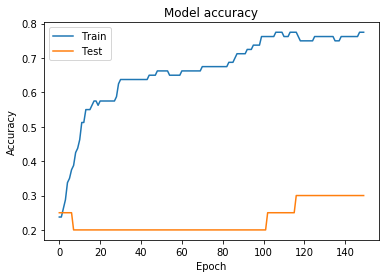

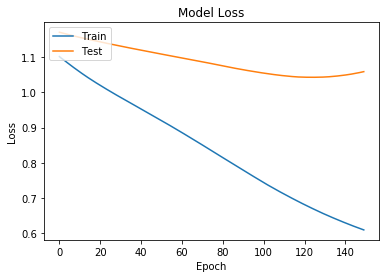

In [3]:
import matplotlib.pyplot as plt
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
with open('001_b_1110_1_1_p1.csv', newline='') as csvfile1:
    data1 = pd.read_csv(csvfile1)
with open('002_b_1110_1_1_p2.csv', newline='') as csvfile2:
    data2 = pd.read_csv(csvfile2)
data1 = data1.rename(columns = {'p1Cash':'Cash','StockPrice':'StockPrice','p1TotalAsset':'TotalAsset',
                                'p1ChechHistory':'ChechHistory'}, inplace = False)

X = data1.loc[:,['Cash','StockPrice','TotalAsset']]
X['TotalAsset'] = data2.loc[:,['TotalAsset']]
X['p1ChechHistory'] = pd.get_dummies(data1.loc[:,'p1ChechHistory'])['yes']
X_1_101 = X[1:101]
X_1_101 = X_1_101.reset_index()
X_0_100 = X[0:100]
X_0_100 = X_0_100.rename(columns = {'p1Cash':'pre_p1Cash','StockPrice':'pre_StockPrice','p1TotalAsset':'pre_p1TotalAsset',
                                   'p2TotalAsset':'pre_p2TotalAsset','p1ChechHistory':'pre_p1ChechHistory'}, inplace = False)


In [47]:
#加上一回合，沒有放 delta_Price
with open('001_b_1110_1_1_p1.csv', newline='') as csvfile1:
    data1 = pd.read_csv(csvfile1)
    data1 = data1[0:100]
with open('002_b_1110_1_1_p2.csv', newline='') as csvfile2:
    data2 = pd.read_csv(csvfile2)
    data2 = data2[0:100]
    
X = data1.loc[:,['p1Cash','StockPrice','p1TotalAsset']]
X['p2TotalAsset'] = data2.loc[:,['p2TotalAsset']]
X['p1ChechHistory'] = pd.get_dummies(data1.loc[:,'p1ChechHistory'])['yes']
X_1_100 = X[1:100]
X_1_100 = X_1_100.reset_index()
X_0_99 = X[0:99]
X_0_99 = X_0_99.rename(columns = {'p1Cash':'pre_p1Cash','StockPrice':'pre_StockPrice','p1TotalAsset':'pre_p1TotalAsset',
                                 'p2TotalAsset':'pre_p2TotalAsset','p1ChechHistory':'pre_p1ChechHistory'}, inplace = False)
X = pd.concat([X_1_100,X_0_99], axis=1)
X = X.drop(['index'], axis = 1)

X = preprocessing.scale(X)

Y = data1.loc[:,'p1Decision']
Y_dum = pd.get_dummies(Y)
Y = Y_dum[1:100]

model = Sequential()
model.add(Dense(80, input_dim = 10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()


# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# fit the model
model.fit(X,Y, epochs = 500, batch_size = 80, validation_split = 0.2, shuffle = True)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 80)                880       
_________________________________________________________________
dense_64 (Dense)             (None, 3)                 243       
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
Train on 79 samples, validate on 20 samples
Epoch 1/500
79/79 [==============================] - 0s 858us/step - loss: 1.1531 - accuracy: 0.2405 - val_loss: 1.2397 - val_accuracy: 0.2000
Epoch 2/500
79/79 [==============================] - 0s 25us/step - loss: 1.1461 - accuracy: 0.2532 - val_loss: 1.2393 - val_accuracy: 0.2000
Epoch 3/500
79/79 [==============================] - 0s 13us/step - loss: 1.1369 - accuracy: 0.2532 - val_loss: 1.2389 - val_accuracy: 0.2000
Epoch 4/500
79/79 [=======================

Epoch 54/500
79/79 [==============================] - 0s 25us/step - loss: 0.8989 - accuracy: 0.5443 - val_loss: 1.2943 - val_accuracy: 0.1500
Epoch 55/500
79/79 [==============================] - 0s 25us/step - loss: 0.8959 - accuracy: 0.5570 - val_loss: 1.2981 - val_accuracy: 0.1500
Epoch 56/500
79/79 [==============================] - 0s 25us/step - loss: 0.8929 - accuracy: 0.5696 - val_loss: 1.3020 - val_accuracy: 0.1500
Epoch 57/500
79/79 [==============================] - 0s 25us/step - loss: 0.8899 - accuracy: 0.5696 - val_loss: 1.3060 - val_accuracy: 0.1500
Epoch 58/500
79/79 [==============================] - 0s 38us/step - loss: 0.8870 - accuracy: 0.5823 - val_loss: 1.3101 - val_accuracy: 0.1500
Epoch 59/500
79/79 [==============================] - 0s 25us/step - loss: 0.8840 - accuracy: 0.5823 - val_loss: 1.3142 - val_accuracy: 0.1500
Epoch 60/500
79/79 [==============================] - 0s 25us/step - loss: 0.8811 - accuracy: 0.5823 - val_loss: 1.3184 - val_accuracy: 0.1500

Epoch 112/500
79/79 [==============================] - 0s 26us/step - loss: 0.7615 - accuracy: 0.5949 - val_loss: 1.7605 - val_accuracy: 0.1500
Epoch 113/500
79/79 [==============================] - 0s 13us/step - loss: 0.7597 - accuracy: 0.5949 - val_loss: 1.7730 - val_accuracy: 0.1500
Epoch 114/500
79/79 [==============================] - 0s 38us/step - loss: 0.7579 - accuracy: 0.5949 - val_loss: 1.7855 - val_accuracy: 0.1500
Epoch 115/500
79/79 [==============================] - 0s 25us/step - loss: 0.7561 - accuracy: 0.5949 - val_loss: 1.7981 - val_accuracy: 0.1500
Epoch 116/500
79/79 [==============================] - 0s 25us/step - loss: 0.7544 - accuracy: 0.5949 - val_loss: 1.8107 - val_accuracy: 0.1500
Epoch 117/500
79/79 [==============================] - 0s 25us/step - loss: 0.7526 - accuracy: 0.5949 - val_loss: 1.8233 - val_accuracy: 0.1500
Epoch 118/500
79/79 [==============================] - 0s 12us/step - loss: 0.7509 - accuracy: 0.5949 - val_loss: 1.8359 - val_accuracy:

Epoch 169/500
79/79 [==============================] - 0s 26us/step - loss: 0.6755 - accuracy: 0.6582 - val_loss: 2.5216 - val_accuracy: 0.1500
Epoch 170/500
79/79 [==============================] - 0s 13us/step - loss: 0.6742 - accuracy: 0.6582 - val_loss: 2.5345 - val_accuracy: 0.1500
Epoch 171/500
79/79 [==============================] - 0s 25us/step - loss: 0.6728 - accuracy: 0.6582 - val_loss: 2.5474 - val_accuracy: 0.1500
Epoch 172/500
79/79 [==============================] - 0s 26us/step - loss: 0.6715 - accuracy: 0.6582 - val_loss: 2.5605 - val_accuracy: 0.1500
Epoch 173/500
79/79 [==============================] - 0s 25us/step - loss: 0.6701 - accuracy: 0.6582 - val_loss: 2.5734 - val_accuracy: 0.1500
Epoch 174/500
79/79 [==============================] - 0s 25us/step - loss: 0.6688 - accuracy: 0.6582 - val_loss: 2.5862 - val_accuracy: 0.1500
Epoch 175/500
79/79 [==============================] - 0s 25us/step - loss: 0.6674 - accuracy: 0.6582 - val_loss: 2.5989 - val_accuracy:

Epoch 226/500
79/79 [==============================] - 0s 38us/step - loss: 0.5992 - accuracy: 0.7468 - val_loss: 3.2537 - val_accuracy: 0.1500
Epoch 227/500
79/79 [==============================] - 0s 25us/step - loss: 0.5979 - accuracy: 0.7468 - val_loss: 3.2677 - val_accuracy: 0.1500
Epoch 228/500
79/79 [==============================] - 0s 25us/step - loss: 0.5966 - accuracy: 0.7468 - val_loss: 3.2822 - val_accuracy: 0.1500
Epoch 229/500
79/79 [==============================] - 0s 38us/step - loss: 0.5952 - accuracy: 0.7468 - val_loss: 3.2970 - val_accuracy: 0.1500
Epoch 230/500
79/79 [==============================] - 0s 38us/step - loss: 0.5939 - accuracy: 0.7468 - val_loss: 3.3122 - val_accuracy: 0.1500
Epoch 231/500
79/79 [==============================] - 0s 25us/step - loss: 0.5926 - accuracy: 0.7468 - val_loss: 3.3274 - val_accuracy: 0.1500
Epoch 232/500
79/79 [==============================] - 0s 38us/step - loss: 0.5912 - accuracy: 0.7468 - val_loss: 3.3427 - val_accuracy:

Epoch 283/500
79/79 [==============================] - 0s 12us/step - loss: 0.5290 - accuracy: 0.8354 - val_loss: 4.2173 - val_accuracy: 0.1500
Epoch 284/500
79/79 [==============================] - 0s 25us/step - loss: 0.5279 - accuracy: 0.8354 - val_loss: 4.2351 - val_accuracy: 0.1500
Epoch 285/500
79/79 [==============================] - 0s 26us/step - loss: 0.5268 - accuracy: 0.8354 - val_loss: 4.2531 - val_accuracy: 0.1500
Epoch 286/500
79/79 [==============================] - 0s 25us/step - loss: 0.5256 - accuracy: 0.8354 - val_loss: 4.2709 - val_accuracy: 0.1500
Epoch 287/500
79/79 [==============================] - 0s 38us/step - loss: 0.5245 - accuracy: 0.8354 - val_loss: 4.2887 - val_accuracy: 0.1500
Epoch 288/500
79/79 [==============================] - 0s 38us/step - loss: 0.5234 - accuracy: 0.8354 - val_loss: 4.3066 - val_accuracy: 0.1500
Epoch 289/500
79/79 [==============================] - 0s 13us/step - loss: 0.5222 - accuracy: 0.8354 - val_loss: 4.3248 - val_accuracy:

Epoch 340/500
79/79 [==============================] - 0s 25us/step - loss: 0.4682 - accuracy: 0.8481 - val_loss: 5.2803 - val_accuracy: 0.1500
Epoch 341/500
79/79 [==============================] - 0s 38us/step - loss: 0.4671 - accuracy: 0.8481 - val_loss: 5.3014 - val_accuracy: 0.1500
Epoch 342/500
79/79 [==============================] - 0s 25us/step - loss: 0.4661 - accuracy: 0.8481 - val_loss: 5.3226 - val_accuracy: 0.1500
Epoch 343/500
79/79 [==============================] - 0s 12us/step - loss: 0.4651 - accuracy: 0.8481 - val_loss: 5.3433 - val_accuracy: 0.1500
Epoch 344/500
79/79 [==============================] - 0s 25us/step - loss: 0.4640 - accuracy: 0.8481 - val_loss: 5.3641 - val_accuracy: 0.1500
Epoch 345/500
79/79 [==============================] - 0s 25us/step - loss: 0.4630 - accuracy: 0.8481 - val_loss: 5.3846 - val_accuracy: 0.1500
Epoch 346/500
79/79 [==============================] - 0s 25us/step - loss: 0.4620 - accuracy: 0.8481 - val_loss: 5.4052 - val_accuracy:

Epoch 397/500
79/79 [==============================] - 0s 38us/step - loss: 0.4148 - accuracy: 0.8608 - val_loss: 6.5311 - val_accuracy: 0.1500
Epoch 398/500
79/79 [==============================] - 0s 12us/step - loss: 0.4140 - accuracy: 0.8608 - val_loss: 6.5521 - val_accuracy: 0.1500
Epoch 399/500
79/79 [==============================] - 0s 37us/step - loss: 0.4132 - accuracy: 0.8608 - val_loss: 6.5727 - val_accuracy: 0.1500
Epoch 400/500
79/79 [==============================] - 0s 25us/step - loss: 0.4124 - accuracy: 0.8608 - val_loss: 6.5934 - val_accuracy: 0.1500
Epoch 401/500
79/79 [==============================] - 0s 25us/step - loss: 0.4116 - accuracy: 0.8608 - val_loss: 6.6145 - val_accuracy: 0.1500
Epoch 402/500
79/79 [==============================] - 0s 25us/step - loss: 0.4108 - accuracy: 0.8608 - val_loss: 6.6355 - val_accuracy: 0.1500
Epoch 403/500
79/79 [==============================] - 0s 38us/step - loss: 0.4100 - accuracy: 0.8608 - val_loss: 6.6559 - val_accuracy:

Epoch 454/500
79/79 [==============================] - 0s 25us/step - loss: 0.3725 - accuracy: 0.8481 - val_loss: 7.5546 - val_accuracy: 0.1500
Epoch 455/500
79/79 [==============================] - 0s 25us/step - loss: 0.3718 - accuracy: 0.8481 - val_loss: 7.5710 - val_accuracy: 0.1500
Epoch 456/500
79/79 [==============================] - 0s 25us/step - loss: 0.3711 - accuracy: 0.8481 - val_loss: 7.5874 - val_accuracy: 0.1500
Epoch 457/500
79/79 [==============================] - 0s 26us/step - loss: 0.3705 - accuracy: 0.8481 - val_loss: 7.6040 - val_accuracy: 0.1500
Epoch 458/500
79/79 [==============================] - 0s 25us/step - loss: 0.3698 - accuracy: 0.8481 - val_loss: 7.6205 - val_accuracy: 0.1500
Epoch 459/500
79/79 [==============================] - 0s 13us/step - loss: 0.3691 - accuracy: 0.8481 - val_loss: 7.6366 - val_accuracy: 0.1500
Epoch 460/500
79/79 [==============================] - 0s 26us/step - loss: 0.3684 - accuracy: 0.8481 - val_loss: 7.6526 - val_accuracy:

In [2]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(80, input_dim = 10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()


# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

test = model.fit(X,Y, epochs = 500, batch_size = 80, validation_split = 0.2, shuffle = True)
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                880       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 243       
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking input: expected dense_3_input to have shape (10,) but got array with shape (5,)

In [4]:
# delta Price!!!!!!!!!!!作為input
with open('001_b_1110_1_1_p1.csv', newline='') as csvfile1:
    data1 = pd.read_csv(csvfile1)
with open('002_b_1110_1_1_p2.csv', newline='') as csvfile2:
    data2 = pd.read_csv(csvfile2)
X = data1.loc[:,['p1Cash','StockPrice','p1TotalAsset']]
X['p2TotalAsset'] = data2.loc[:,['p2TotalAsset']]
X['p1ChechHistory'] = pd.get_dummies(data1.loc[:,'p1ChechHistory'])['yes']
X_1_101 = X[1:101]
X_1_101 = X_1_101.reset_index()
X_0_100 = X[0:100]
X_0_100 = X_0_100.rename(columns = {'p1Cash':'pre_p1Cash','StockPrice':'pre_StockPrice','p1TotalAsset':'pre_p1TotalAsset',
                                   'p2TotalAsset':'pre_p2TotalAsset','p1ChechHistory':'pre_p1ChechHistory'}, inplace = False)
X = pd.concat([X_1_101,X_0_100], axis=1)
X = X.drop(['index'], axis = 1)
X['delta_Price'] = X['StockPrice']-X['pre_StockPrice']
X = X[0:99]

X = preprocessing.scale(X)

Y = data1.loc[:,'p1Decision']
Y_dum = pd.get_dummies(Y)
Y = Y_dum[1:100]

model = Sequential()
model.add(Dense(80, input_dim = 11, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()


# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

test = model.fit(X,Y, epochs = 500, batch_size = 80, validation_split = 0.2, shuffle = True)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 80)                960       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 243       
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
Train on 79 samples, validate on 20 samples
Epoch 1/500
79/79 [==============================] - 0s 903us/step - loss: 1.1278 - accuracy: 0.2911 - val_loss: 1.0765 - val_accuracy: 0.4500
Epoch 2/500
79/79 [==============================] - 0s 25us/step - loss: 1.1214 - accuracy: 0.3165 - val_loss: 1.0811 - val_accuracy: 0.4000
Epoch 3/500
79/79 [==============================] - 0s 25us/step - loss: 1.1142 - accuracy: 0.3165 - val_loss: 1.0866 - val_accuracy: 0.3500
Epoch 4/500
79/79 [========================

Epoch 54/500
79/79 [==============================] - 0s 25us/step - loss: 0.8482 - accuracy: 0.6076 - val_loss: 1.5251 - val_accuracy: 0.1000
Epoch 55/500
79/79 [==============================] - 0s 25us/step - loss: 0.8449 - accuracy: 0.6076 - val_loss: 1.5378 - val_accuracy: 0.1000
Epoch 56/500
79/79 [==============================] - 0s 25us/step - loss: 0.8417 - accuracy: 0.6076 - val_loss: 1.5508 - val_accuracy: 0.1000
Epoch 57/500
79/79 [==============================] - 0s 25us/step - loss: 0.8384 - accuracy: 0.6076 - val_loss: 1.5638 - val_accuracy: 0.1000
Epoch 58/500
79/79 [==============================] - 0s 25us/step - loss: 0.8353 - accuracy: 0.6203 - val_loss: 1.5772 - val_accuracy: 0.1000
Epoch 59/500
79/79 [==============================] - 0s 25us/step - loss: 0.8321 - accuracy: 0.6203 - val_loss: 1.5906 - val_accuracy: 0.1000
Epoch 60/500
79/79 [==============================] - 0s 25us/step - loss: 0.8290 - accuracy: 0.6203 - val_loss: 1.6042 - val_accuracy: 0.1000

Epoch 112/500
79/79 [==============================] - 0s 38us/step - loss: 0.7034 - accuracy: 0.5696 - val_loss: 2.4435 - val_accuracy: 0.1000
Epoch 113/500
79/79 [==============================] - 0s 26us/step - loss: 0.7015 - accuracy: 0.5696 - val_loss: 2.4586 - val_accuracy: 0.1000
Epoch 114/500
79/79 [==============================] - 0s 25us/step - loss: 0.6997 - accuracy: 0.5823 - val_loss: 2.4734 - val_accuracy: 0.1000
Epoch 115/500
79/79 [==============================] - 0s 25us/step - loss: 0.6978 - accuracy: 0.5949 - val_loss: 2.4880 - val_accuracy: 0.1000
Epoch 116/500
79/79 [==============================] - 0s 26us/step - loss: 0.6959 - accuracy: 0.6076 - val_loss: 2.5025 - val_accuracy: 0.1000
Epoch 117/500
79/79 [==============================] - 0s 25us/step - loss: 0.6941 - accuracy: 0.6329 - val_loss: 2.5170 - val_accuracy: 0.1000
Epoch 118/500
79/79 [==============================] - 0s 25us/step - loss: 0.6922 - accuracy: 0.6329 - val_loss: 2.5314 - val_accuracy:

Epoch 169/500
79/79 [==============================] - 0s 25us/step - loss: 0.6049 - accuracy: 0.6962 - val_loss: 3.2622 - val_accuracy: 0.1500
Epoch 170/500
79/79 [==============================] - 0s 25us/step - loss: 0.6033 - accuracy: 0.6962 - val_loss: 3.2778 - val_accuracy: 0.1500
Epoch 171/500
79/79 [==============================] - 0s 25us/step - loss: 0.6017 - accuracy: 0.7089 - val_loss: 3.2936 - val_accuracy: 0.1500
Epoch 172/500
79/79 [==============================] - 0s 25us/step - loss: 0.6000 - accuracy: 0.7089 - val_loss: 3.3091 - val_accuracy: 0.1500
Epoch 173/500
79/79 [==============================] - 0s 25us/step - loss: 0.5984 - accuracy: 0.7089 - val_loss: 3.3246 - val_accuracy: 0.1500
Epoch 174/500
79/79 [==============================] - 0s 37us/step - loss: 0.5968 - accuracy: 0.7089 - val_loss: 3.3402 - val_accuracy: 0.1500
Epoch 175/500
79/79 [==============================] - 0s 13us/step - loss: 0.5952 - accuracy: 0.7089 - val_loss: 3.3560 - val_accuracy:

Epoch 226/500
79/79 [==============================] - 0s 25us/step - loss: 0.5140 - accuracy: 0.8101 - val_loss: 4.3423 - val_accuracy: 0.1500
Epoch 227/500
79/79 [==============================] - 0s 25us/step - loss: 0.5125 - accuracy: 0.8228 - val_loss: 4.3654 - val_accuracy: 0.1500
Epoch 228/500
79/79 [==============================] - 0s 25us/step - loss: 0.5109 - accuracy: 0.8228 - val_loss: 4.3883 - val_accuracy: 0.1500
Epoch 229/500
79/79 [==============================] - 0s 25us/step - loss: 0.5093 - accuracy: 0.8228 - val_loss: 4.4110 - val_accuracy: 0.1500
Epoch 230/500
79/79 [==============================] - 0s 25us/step - loss: 0.5078 - accuracy: 0.8228 - val_loss: 4.4338 - val_accuracy: 0.1500
Epoch 231/500
79/79 [==============================] - 0s 13us/step - loss: 0.5062 - accuracy: 0.8228 - val_loss: 4.4571 - val_accuracy: 0.1500
Epoch 232/500
79/79 [==============================] - 0s 25us/step - loss: 0.5047 - accuracy: 0.8228 - val_loss: 4.4807 - val_accuracy:

Epoch 283/500
79/79 [==============================] - 0s 25us/step - loss: 0.4354 - accuracy: 0.8861 - val_loss: 5.7012 - val_accuracy: 0.1500
Epoch 284/500
79/79 [==============================] - 0s 38us/step - loss: 0.4342 - accuracy: 0.8861 - val_loss: 5.7267 - val_accuracy: 0.1500
Epoch 285/500
79/79 [==============================] - 0s 25us/step - loss: 0.4331 - accuracy: 0.8861 - val_loss: 5.7519 - val_accuracy: 0.1500
Epoch 286/500
79/79 [==============================] - 0s 25us/step - loss: 0.4319 - accuracy: 0.8861 - val_loss: 5.7771 - val_accuracy: 0.1500
Epoch 287/500
79/79 [==============================] - 0s 25us/step - loss: 0.4307 - accuracy: 0.8861 - val_loss: 5.8024 - val_accuracy: 0.1500
Epoch 288/500
79/79 [==============================] - 0s 37us/step - loss: 0.4296 - accuracy: 0.8861 - val_loss: 5.8287 - val_accuracy: 0.1500
Epoch 289/500
79/79 [==============================] - 0s 25us/step - loss: 0.4284 - accuracy: 0.8861 - val_loss: 5.8549 - val_accuracy:

Epoch 340/500
79/79 [==============================] - 0s 25us/step - loss: 0.3757 - accuracy: 0.9114 - val_loss: 7.1817 - val_accuracy: 0.1500
Epoch 341/500
79/79 [==============================] - 0s 25us/step - loss: 0.3748 - accuracy: 0.9241 - val_loss: 7.2054 - val_accuracy: 0.1500
Epoch 342/500
79/79 [==============================] - 0s 25us/step - loss: 0.3738 - accuracy: 0.9241 - val_loss: 7.2290 - val_accuracy: 0.1500
Epoch 343/500
79/79 [==============================] - 0s 13us/step - loss: 0.3729 - accuracy: 0.9241 - val_loss: 7.2527 - val_accuracy: 0.1500
Epoch 344/500
79/79 [==============================] - 0s 25us/step - loss: 0.3720 - accuracy: 0.9241 - val_loss: 7.2765 - val_accuracy: 0.1500
Epoch 345/500
79/79 [==============================] - 0s 37us/step - loss: 0.3710 - accuracy: 0.9241 - val_loss: 7.3003 - val_accuracy: 0.1500
Epoch 346/500
79/79 [==============================] - 0s 26us/step - loss: 0.3701 - accuracy: 0.9241 - val_loss: 7.3238 - val_accuracy:

Epoch 397/500
79/79 [==============================] - 0s 12us/step - loss: 0.3244 - accuracy: 0.9241 - val_loss: 8.5148 - val_accuracy: 0.1500
Epoch 398/500
79/79 [==============================] - 0s 25us/step - loss: 0.3235 - accuracy: 0.9241 - val_loss: 8.5352 - val_accuracy: 0.1500
Epoch 399/500
79/79 [==============================] - 0s 25us/step - loss: 0.3227 - accuracy: 0.9241 - val_loss: 8.5553 - val_accuracy: 0.1500
Epoch 400/500
79/79 [==============================] - 0s 26us/step - loss: 0.3218 - accuracy: 0.9241 - val_loss: 8.5753 - val_accuracy: 0.1500
Epoch 401/500
79/79 [==============================] - 0s 25us/step - loss: 0.3210 - accuracy: 0.9241 - val_loss: 8.5950 - val_accuracy: 0.1500
Epoch 402/500
79/79 [==============================] - 0s 25us/step - loss: 0.3201 - accuracy: 0.9241 - val_loss: 8.6147 - val_accuracy: 0.1500
Epoch 403/500
79/79 [==============================] - 0s 25us/step - loss: 0.3193 - accuracy: 0.9241 - val_loss: 8.6350 - val_accuracy:

Epoch 454/500
79/79 [==============================] - 0s 25us/step - loss: 0.2787 - accuracy: 0.9494 - val_loss: 9.5826 - val_accuracy: 0.1500
Epoch 455/500
79/79 [==============================] - 0s 13us/step - loss: 0.2780 - accuracy: 0.9494 - val_loss: 9.5984 - val_accuracy: 0.1500
Epoch 456/500
79/79 [==============================] - 0s 38us/step - loss: 0.2772 - accuracy: 0.9494 - val_loss: 9.6140 - val_accuracy: 0.1500
Epoch 457/500
79/79 [==============================] - 0s 26us/step - loss: 0.2765 - accuracy: 0.9494 - val_loss: 9.6293 - val_accuracy: 0.1500
Epoch 458/500
79/79 [==============================] - 0s 25us/step - loss: 0.2758 - accuracy: 0.9494 - val_loss: 9.6445 - val_accuracy: 0.1500
Epoch 459/500
79/79 [==============================] - 0s 13us/step - loss: 0.2751 - accuracy: 0.9494 - val_loss: 9.6601 - val_accuracy: 0.1500
Epoch 460/500
79/79 [==============================] - 0s 38us/step - loss: 0.2745 - accuracy: 0.9494 - val_loss: 9.6762 - val_accuracy:

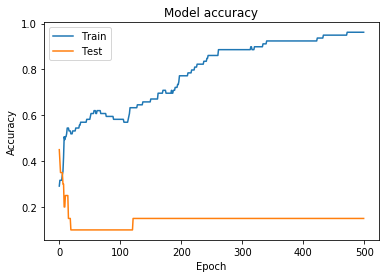

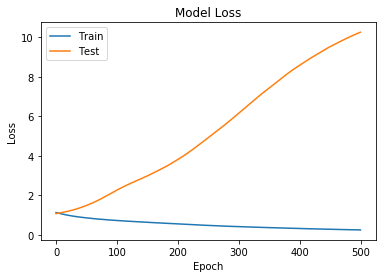

In [5]:
import matplotlib.pyplot as plt
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Value = Price*Stock 
Asset差距

要放嗎?
可能的問題:
1. Sample數不夠
2. 選的變項根本沒關係

用ANOVA找有顯著的變項

先設定單一策略去進行實驗做出data在train model確保model可以預測該進行策略->用於debug(因為已經知道答案)